# Pandas 3
### Name: Quin Daly
### Class: Math 403
### Date: 9/14/2021

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [172]:
def prob1():
    """
    Use groupby objects to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    For each column return the values of the describe function
    for the type of university with the higher mean.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    df = pd.read_csv('college.csv', index_col=0)
    private = df.groupby('Private')
    
    # Find max index for S.F.Ratio
    describe = private['S.F.Ratio'].describe()
    max_SF = describe['mean'].idxmax()
    max_SF = describe.iloc[0].values
    
    # Find the max Top10perc
    describe = private['Top10perc'].describe()
    max_10 = describe['mean'].idxmax()
    max_10 = describe.iloc[1].values
    
    # Find max Top25perc
    describe = private['Top25perc'].describe()
    max_25 = describe['mean'].idxmax()
    max_25 = describe.iloc[1].values
    
    return (max_SF, max_10, max_25)
    
    
    

In [173]:
prob1()

(array([212.        ,  17.13915094,   3.41804873,   6.7       ,
         15.1       ,  17.25      ,  19.325     ,  28.8       ]),
 array([565.        ,  29.33097345,  17.85139147,   1.        ,
         17.        ,  25.        ,  36.        ,  96.        ]),
 array([565.        ,  56.95752212,  19.58836048,   9.        ,
         42.        ,  55.        ,  70.        , 100.        ]))

# Problem 2

In [174]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    df = pd.read_csv('college.csv', index_col=0)
    private = df.groupby('Private')
    
    # Create plot showing difference of applicants, accepted, enrolled
    private[['Apps', 'Accept', 'Enroll']].mean().plot(kind='barh', title='Admission Data for Public & Private')
    plt.xlabel('Mean Value')
    
    # Create plot showing difference of money spent on room/board
    private.get_group('Yes').plot(kind='hist', y='Room.Board', legend=False, title='Room & Board Cost - Private Schools')
    plt.xlabel('Money Spent')
    private.get_group('No').plot(kind='hist', y='Room.Board', legend=False, title='Room & Board Cost - Private Schools')
    plt.xlabel('Money Spent')
    
    return plt.show()

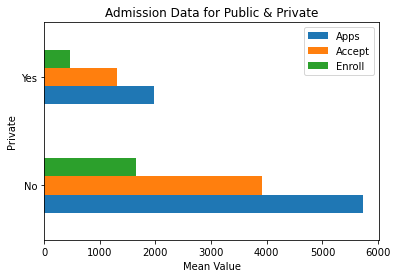

In [175]:
prob2()

# Problem 3

In [176]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination makes the most money in total?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week per person?
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    df = pd.read_csv('Ohio_1999.csv')
    
    # Which race/sex combo has highest Usual Wkly Earnings in total
    total_earnings = df.pivot_table(values='Usual Weekly Earnings', index='Race', columns='Sex', aggfunc='sum')
    total_earnings_max = (1,1) # White males make most money in total
    
    # Which race/sex combo worked least cumulative hours
    sum_hours = df.pivot_table(values='Usual Hours Worked', index='Race', columns='Sex', aggfunc='sum')
    sum_hours_min = (3,2) # Native American/Eskimo Women worked least hours in total
    
    # Which race/sex combo worked most hours/week per person
    avg_hours_person = df.pivot_table(values='Usual Hours Worked', index='Race', columns='Sex')
    avg_hours_person_max = (3,1) # Native American/Eskimo men worked most hours/person/week
    
    return total_earnings_max, sum_hours_min, avg_hours_person_max
    

In [177]:
prob3()

((1, 1), (3, 2), (3, 1))

# Problem 4

In [178]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which age group works the most hours on average?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    df = pd.read_csv('Ohio_1999.csv')
    
    # Determine most common degree type
    degree = pd.cut(df['Educational Attainment'], [0, 38, 42, 46])
    table = df.pivot_table(values='Educational Attainment', index=degree, aggfunc='count')
    degree_type = table.sum(axis=1).idxmax()
    
    # Determine which age interval has highest average Usual Hours Worked
    age = pd.cut(df['Age'], 6)
    table = df.pivot_table(values='Usual Hours Worked', index=age, aggfunc='mean')
    age_range = table.sum(axis=1).idxmax()
    
    # Determine which age/degree combo has lowest yearly salary on average
    table = df.pivot_table(values='Yearly Salary', index=[age,degree], aggfunc='mean')
    age_degree_combo = table.sum(axis=1).idxmax()
    
    return degree_type, age_range, age_degree_combo

In [179]:
prob4()

(Interval(38, 42, closed='right'),
 Interval(39.0, 50.5, closed='right'),
 (Interval(62.0, 73.5, closed='right'), Interval(42, 46, closed='right')))

# Problem 5

In [184]:
def prob5():
    """
    Use pivot tables and groupby objects on the data in
    College.csv to answer the following questions:
        1. Is there a correlation between the percent of alumni
           that donate and the amount the school spends per
           student in both private and public universities?
        2. Is the graduation rate partition with the greatest
           number of schools the same for private and public
           universities?
        3. Is there an inverse correlation between acceptance
           rate and having students from the top 10% of their
           high school class?
        4. Why is the average percentage of students admitted
           from the top 10 percent of their high school class
           so high in private universities with very low
           acceptance rates? Use only the data to explain why; 
           do not extrapolate.
    
    Returns:
        ans_1 (bool): answer to question 1
        ans_2 (bool): answer to question 2
        ans_3 (bool): answer to question 3
        ans_4 (str): answer to question 4
    """
    df = pd.read_csv('college.csv', index_col=0)
    
    # Correlation between % alumni that donate and school spending in private & public
    private = df.groupby('Private')
    public_corr = private[['perc.alumni','Expend']].get_group('No').corr()
    private_corr = private[['perc.alumni','Expend']].get_group('Yes').corr()
    both_corr = False
    
    # Is the Grad.Rate partition with greatest # school same for public & private
    grad = pd.cut(df['Grad.Rate'], [0,20,40,60,80])
    table = df.pivot_table(values='Grad.Rate', index=grad, columns='Private', aggfunc='count')
    grad_max = False
    
    # Low acceptance rate correlation with Top10perc for private & public
    accept = pd.cut(df['Accept']/df['Apps'], [0,20,40,60,80,100])
    table = df.pivot_table(values='Top10perc', index=accept, columns='Private')
    accept_rate = True
    
    # Reason for high Top10perc in private with low acceptance rate
    apps = pd.cut(df['Apps'], 8)
    table = df.pivot_table(values='Accept',index=[apps], columns=['Private'], aggfunc='count')
    answer_4 = 'The number of applications at private schools is quite high. Thus, if they only accept a small portion of those applications, they will most likely be selecting the best performers. This makes their acceptance rate low and their Top10perc high.'
    
    return (both_corr, grad_max, accept_rate, answer_4)
    
    
    

In [185]:
prob5()

(False,
 False,
 True,
 'The number of applications at private schools is quite high. Thus, if they only accept a small portion of those applications, they will most likely be selecting the best performers. This makes their acceptance rate low and their Top10perc high.')